<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_1a_SRAL_data_access_Data_Store.ipynb"><< Accessing SRAL data</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_3_SRAL_coverage.ipynb">Determining SRAL product coverage >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Vinca Rosmorduc (CLS)

<html>
    <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-sral"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=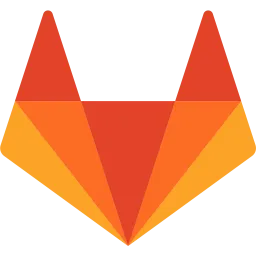" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://user.eumetsat.int/search-view?term=learn%20sral&sort=score%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CSoftware%20%26%20code%22%5D,%22org-satellite-sensor%22:%5B%22EUMETSAT%7CSentinel-3%7CSRAL%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D%7D"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg?style=flat&logo=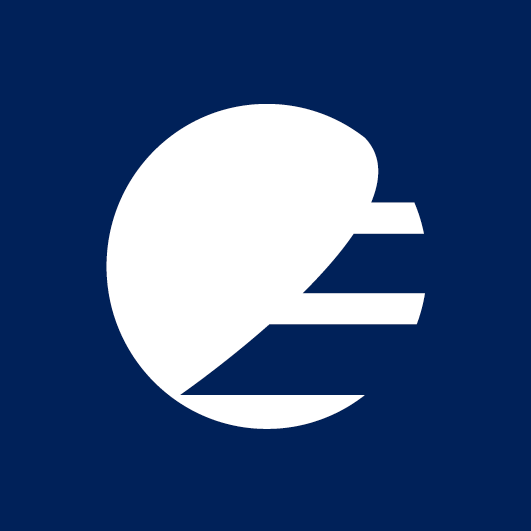" alt="Open in user portal"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-sral/HEAD?urlpath=%2Ftree%2F1_SRAL_introductory%2F1_2_SRAL_file_structure.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Launch on Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-sral/1_SRAL_introductory/1_2_SRAL_file_structure.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Launch on WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div> 
</html>

<div class="alert alert-block alert-success">
<h3>Learn SRAL: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1a_SRAL_data_access_Data_Store.ipynb" target="_blank">1_1a_SRAL_data_access_Data_Store.ipynb</a>** if using the Data Store for data access
    <br><br>**OR**<br><br>
  - **<a href="./1_1b_SRAL_data_access_HDA.ipynb" target="_blank">1_1b_SRAL_data_access_HDA.ipynb</a>** if using WEkEO for data access
    
</div>
<hr>

# 1.2 Understanding SRAL product structure

### Data used

| Product Description  | EUMETSAT collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:--------:|
| Sentinel-3 SRAL level 1b | EO:EUM:DAT:0406 |<a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:SR_1_SRA___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:SR_1_SRA___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASR_1_SRA___" target="_blank">Description</a> |
| Sentinel-3 SRAL level 2 | EO:EUM:DAT:0415 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:SR_2_WAT___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:SR_2_WAT___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASR_2_WAT___" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know;
* What the SAFE format is
* What components are inside a SAFE format file from SRAL
* What variables are in present in each component for SRAL data files (level-1B and level-2)

### Outline

Data from all the Sentinel satellites operated under the European Commissions Copernicus Programme are delievered in "**SAFE format**". The Sentinel-SAFE format is a specific variation of the Standard Archive Format for Europe (SAFE) format specification designed for the Sentinel satellite products.  It is based on the XML Formatted Data Units (XFDU) standard under development by the Consultative Committee for Space Data Systems (CCSDS). Sentinel-SAFE is a profile of XFDU, and it restricts the XFDU specifications for specific utilisation in the Earth Observation domain, providing semantics in the same domain to improve interoperability between ground segment facilities.


Each product package includes:

* a manifest file containing a metadata section and a data object section (an xml file).

* measurement data files (NetCDF-4 format)

* annotation data files, if defined (NetCDF-4 format)

The product package can exist as a directory in a filesystem, zipped folder or tarball. You can find more information on the contents of OLCI products in the <a href="https://user.eumetsat.int/resources/user-guides/sentinel-3-altimetry-level-1-data-guide" target="_blank">Sentinel-3 altimetry level 1 data guide</a> and <a href="https://user.eumetsat.int/resources/user-guides/sentinel-3-altimetry-level-2-data-guide" target="_blank">Sentinel-3 altimetry level 2 data guide</a> on our <a href="https://user.eumetsat.int/dashboard" target="_blank">User Portal</a>. Similarly, you can learn more about the Sentinel-SAFE format and conventions in the <a href="https://user.eumetsat.int/resources/user-guides/sentinel-safe-format-guide" target="_blank">Sentinel SAFE format guide</a>.

<div class="alert alert-info" role="alert">

## <a id='TOC-TOP'></a>Contents

</div>
    
 1. [Querying SRAL file structure (Level-1B)](#section1)
 2. [Querying SRAL file structure (Level-2)](#section2)
 3. [Applying your knowledge](#section3)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
import os                                     # a library that allows us access to basic operating system commands
import glob                                   # a library that aids in searching for files
from IPython.display import display, Markdown # a library that helps us display HTML and markdown
import xarray as xr                           # a library that supports the use of multi-dimensional arrays in Python
import xml.etree.ElementTree as ET            # a library that helps us parse XML files
import warnings                               # a library that helps us manage warnings
warnings.filterwarnings('ignore')

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Querying SRAL file structure (Level-1B)
[Back to top](#TOC-TOP)

</div>

First we will create a variable which holds the path for the file we are interested in, in this case the level-1B SRAL file that we downloaded in the <a href="./1_1_SRAL_data_access.ipynb" target="_blank"> SRAL data access</a> notebook.

In [2]:
# selecting SAFE directory
SAFE_directory = os.path.join(os.getcwd(), 'products', 
    'S3B_SR_1_SRA____20240206T104924_20240206T113954_20240303T021922_3029_089_208______MAR_O_NT_005.SEN3')

Next, we'll create another variable that takes this path, and finds and adds on the names of the manifest file within the SAFE folder.  

In [3]:
# selecting SAFE manifest
SAFE_manifest = glob.glob(os.path.join(SAFE_directory, 'xfd*.xml'))[0]
display(Markdown('**Manifest file:** {}'.format(os.path.basename(SAFE_manifest))))

**Manifest file:** xfdumanifest.xml

Then, we'll read the manifest file in to a Python object format called a dictionary. This will make it easier for us to interact with the product in the next step.

In [4]:
# Reading SAFE manifest and outputting/collecting component names
tree = ET.parse(SAFE_manifest)
root = tree.getroot()
items = root.find('dataObjectSection')
SAFE_components = []
for item in items:
    display(Markdown("**File name:** {}".format(item[0][0].get('href'))))
    display(Markdown("*File info: {}*".format(item[0][0].get('textInfo'))))
    SAFE_components.append(os.path.join(SAFE_directory, item[0][0].get('href')))

**File name:** measurement.nc

*File info: Measurement Data Object File*

**File name:** acquisition.nc

*File info: Acquisition Data Object File*

The next section of code will display each of the components within the product. Scrolling through you can see the main groups of variables, including some you may already know or be interested in working with.

In [5]:
# Display component structure and variables
for SAFE_component in sorted(SAFE_components):
    ds = xr.open_dataset(SAFE_component, decode_times=False)
    display(Markdown('**Filename:** {}'.format(os.path.basename(SAFE_component))))
    display(ds)
    ds.close()

**Filename:** acquisition.nc

<xarray.Dataset> Size: 756B
Dimensions:                                (time_l1b_acq: 9)
Coordinates:
  * time_l1b_acq                           (time_l1b_acq) float64 72B 7.605e+...
    lat_l1b_acq                            (time_l1b_acq) float64 72B ...
    lon_l1b_acq                            (time_l1b_acq) float64 72B ...
Data variables:
    isp_coarse_time_l1b_acq                (time_l1b_acq) float64 72B ...
    isp_fine_time_l1b_acq                  (time_l1b_acq) float64 72B ...
    sral_fine_time_l1b_acq                 (time_l1b_acq) float64 72B ...
    alt_l1b_acq                            (time_l1b_acq) float64 72B ...
    orb_alt_rate_l1b_acq                   (time_l1b_acq) float32 36B ...
    surf_type_l1b_acq                      (time_l1b_acq) float32 36B ...
    flag_positioning_phase_acq             (time_l1b_acq) float32 36B ...
    flag_search_phase_acq                  (time_l1b_acq) float32 36B ...
    positioning_phase_acq_valid_cyles_ind  (time_l1b_acq) float32 36B ...
    flag_locking_phase_acq                 (time_l1b_acq) float32 36B ...
    locking_phase_acq_valid_cyles_ind      (time_l1b_acq) float32 36B ...
Attributes: (12/29)
    Conventions:                      CF-1.6
    title:                            IPF SRAL Level 1 Measurement
    mission_name:                     Sentinel 3B
    altimeter_sensor_name:            SRAL
    gnss_sensor_name:                 GNSS
    doris_sensor_name:                DORIS
    ...                               ...
    source:                           IPF-SR-1 06.24
    history:                           
    contact:                          ops@eumetsat.int
    creation_time:                    2024-03-03T02:22:33Z
    first_meas_time:                  2024-02-06T10:49:24.364680Z
    last_meas_time:                   2024-02-06T11:39:53.935286Z

**Filename:** measurement.nc

<xarray.Dataset> Size: 353MB
Dimensions:                              (echo_sample_ind: 128,
                                          max_multi_stack_ind: 256,
                                          time_l1b_echo_lrm: 0,
                                          time_l1b_echo_sar_ku: 60801,
                                          time_l1b_echo_plrm: 59397)
Coordinates:
  * echo_sample_ind                      (echo_sample_ind) int8 128B 0 1 ... 127
  * max_multi_stack_ind                  (max_multi_stack_ind) int16 512B 0 ....
  * time_l1b_echo_lrm                    (time_l1b_echo_lrm) float64 0B 
    lat_l1b_echo_lrm                     (time_l1b_echo_lrm) float64 0B ...
    lon_l1b_echo_lrm                     (time_l1b_echo_lrm) float64 0B ...
  * time_l1b_echo_sar_ku                 (time_l1b_echo_sar_ku) float64 486kB ...
    lat_l1b_echo_sar_ku                  (time_l1b_echo_sar_ku) float64 486kB ...
    lon_l1b_echo_sar_ku                  (time_l1b_echo_sar_ku) float64 486kB ...
  * time_l1b_echo_plrm                   (time_l1b_echo_plrm) float64 475kB 7...
    lat_l1b_echo_plrm                    (time_l1b_echo_plrm) float64 475kB ...
    lon_l1b_echo_plrm                    (time_l1b_echo_plrm) float64 475kB ...
Data variables: (12/175)
    UTC_day_l1b_echo_lrm                 (time_l1b_echo_lrm) int64 0B ...
    UTC_sec_l1b_echo_lrm                 (time_l1b_echo_lrm) float64 0B ...
    GPS_time_l1b_echo_lrm                (time_l1b_echo_lrm) float64 0B ...
    isp_coarse_time_l1b_echo_lrm         (time_l1b_echo_lrm) float64 0B ...
    isp_fine_time_l1b_echo_lrm           (time_l1b_echo_lrm) float64 0B ...
    sral_fine_time_l1b_echo_lrm          (time_l1b_echo_lrm) float64 0B ...
    ...                                   ...
    agc_cor_c_l1b_echo_plrm              (time_l1b_echo_plrm) float64 475kB ...
    sig0_cal_ku_l1b_echo_plrm            (time_l1b_echo_plrm) float64 475kB ...
    sig0_cal_c_l1b_echo_plrm             (time_l1b_echo_plrm) float64 475kB ...
    i2q2_meas_ku_l1b_echo_plrm           (time_l1b_echo_plrm, echo_sample_ind) float64 61MB ...
    i2q2_meas_c_l1b_echo_plrm            (time_l1b_echo_plrm, echo_sample_ind) float64 61MB ...
    stack_mask_vector_l1b_echo_sar_ku    (time_l1b_echo_sar_ku, max_multi_stack_ind) float32 62MB ...
Attributes: (12/33)
    Conventions:                      CF-1.6
    title:                            IPF SRAL Level 1 Measurement
    mission_name:                     Sentinel 3B
    altimeter_sensor_name:            SRAL
    gnss_sensor_name:                 GNSS
    doris_sensor_name:                DORIS
    ...                               ...
    source:                           IPF-SR-1 06.24
    history:                           
    contact:                          ops@eumetsat.int
    creation_time:                    2024-03-03T02:22:33Z
    first_meas_time:                  2024-02-06T10:49:24.364680Z
    last_meas_time:                   2024-02-06T11:39:53.935286Z

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Querying SRAL file structure (Level-2)
[Back to top](#TOC-TOP)

</div>

Now let's look at the level-2 SRAL product that we downloaded previously.

In [6]:
# selecting SAFE directory
SAFE_directory = os.path.join(os.getcwd(), 'products', 
    'S3A_SR_2_WAT____20240202T062911_20240202T071431_20240227T220310_2720_108_291______MAR_O_NT_005.SEN3')

Again, we'll create another variable that takes this path, and finds and adds on the names of the manifest file within the SAFE folder.  

In [7]:
# selecting SAFE manifest
SAFE_manifest = glob.glob(os.path.join(SAFE_directory, 'xfd*.xml'))[0]
display(Markdown('**Manifest file:** {}'.format(os.path.basename(SAFE_manifest))))

**Manifest file:** xfdumanifest.xml

Then, we'll read the manifest file for this level-2 data product in to another dictionary. 

In [8]:
# Reading SAFE manifest and outputting/collecting component names
tree = ET.parse(SAFE_manifest)
root = tree.getroot()
items = root.find('dataObjectSection')
SAFE_components = []
for item in items:
    display(Markdown("**File name:** {}".format(item[0][0].get('href'))))
    display(Markdown("*File info: {}*".format(item[0][0].get('textInfo'))))
    SAFE_components.append(os.path.join(SAFE_directory, item[0][0].get('href')))

**File name:** enhanced_measurement.nc

*File info: Measurement Data Object File*

**File name:** standard_measurement.nc

*File info: Measurement Data Object File*

**File name:** reduced_measurement.nc

*File info: Measurement Data Object File*

Finally, let's display the components of the product...

In [9]:
# Display component structure and variables
for SAFE_component in sorted(SAFE_components):
    ds = xr.open_dataset(SAFE_component)
    display(Markdown('**Filename:** {}'.format(os.path.basename(SAFE_component))))
    display(ds)
    ds.close()

**Filename:** enhanced_measurement.nc

<xarray.Dataset> Size: 149MB
Dimensions:                                        (time_01: 1755,
                                                    time_20_ku: 35072,
                                                    time_20_c: 34299,
                                                    echo_sample_ind: 128)
Coordinates:
  * time_01                                        (time_01) datetime64[ns] 14kB ...
  * time_20_ku                                     (time_20_ku) datetime64[ns] 281kB ...
  * time_20_c                                      (time_20_c) datetime64[ns] 274kB ...
  * echo_sample_ind                                (echo_sample_ind) int8 128B ...
    lat_01                                         (time_01) float64 14kB ...
    lon_01                                         (time_01) float64 14kB ...
    lat_20_ku                                      (time_20_ku) float64 281kB ...
    lon_20_ku                                      (time_20_ku) float64 281kB ...
    lat_20_c                                       (time_20_c) float64 274kB ...
    lon_20_c                                       (time_20_c) float64 274kB ...
Data variables: (12/392)
    UTC_day_01                                     (time_01) datetime64[ns] 14kB ...
    UTC_sec_01                                     (time_01) float64 14kB ...
    UTC_day_20_ku                                  (time_20_ku) datetime64[ns] 281kB ...
    UTC_sec_20_ku                                  (time_20_ku) float64 281kB ...
    UTC_day_20_c                                   (time_20_c) datetime64[ns] 274kB ...
    UTC_sec_20_c                                   (time_20_c) float64 274kB ...
    ...                                             ...
    num_20hz_meas_01_ku                            (time_01) float32 7kB ...
    num_20hz_meas_01_c                             (time_01) float32 7kB ...
    orbit_type_01                                  (time_01) float32 7kB ...
    waveform_qual_ice_20_ku                        (time_20_ku) float32 140kB ...
    iono_cor_alt_filtered_01_ku                    (time_01) float32 7kB ...
    iono_cor_alt_filtered_01_plrm_ku               (time_01) float32 7kB ...
Attributes: (12/64)
    Conventions:                                 CF-1.6
    title:                                       IPF SRAL/MWR Level 2 Measure...
    mission_name:                                Sentinel 3A
    altimeter_sensor_name:                       SRAL
    radiometer_sensor_name:                      MWR
    gnss_sensor_name:                            GNSS
    ...                                          ...
    algo_bias_wind_speed_sig0_sar_ku_added:      -0.0413
    algo_bias_wind_speed_2p_sig0_sar_ku_added:   2.744
    algo_bias_wind_speed_2p_swh_sar_ku_added:    0.0
    algo_bias_wind_speed_sig0_plrm_ku_added:     -0.0382
    algo_bias_wind_speed_2p_sig0_plrm_ku_added:  2.7525
    algo_bias_wind_speed_2p_swh_plrm_ku_added:   0.0

**Filename:** reduced_measurement.nc

<xarray.Dataset> Size: 555kB
Dimensions:                               (time_01: 1755)
Coordinates:
  * time_01                               (time_01) datetime64[ns] 14kB 2024-...
    lat_01                                (time_01) float64 14kB ...
    lon_01                                (time_01) float64 14kB ...
Data variables: (12/62)
    UTC_day_01                            (time_01) datetime64[ns] 14kB ...
    UTC_sec_01                            (time_01) float64 14kB ...
    surf_type_01                          (time_01) float32 7kB ...
    surf_class_01                         (time_01) float32 7kB ...
    rad_surf_type_01                      (time_01) float32 7kB ...
    dist_coast_01                         (time_01) float64 14kB ...
    ...                                    ...
    rain_flag_01_plrm_ku                  (time_01) float32 7kB ...
    open_sea_ice_flag_01_ku               (time_01) float32 7kB ...
    open_sea_ice_flag_01_plrm_ku          (time_01) float32 7kB ...
    orbit_type_01                         (time_01) float32 7kB ...
    iono_cor_alt_filtered_01_ku           (time_01) float32 7kB ...
    iono_cor_alt_filtered_01_plrm_ku      (time_01) float32 7kB ...
Attributes: (12/64)
    Conventions:                                 CF-1.6
    title:                                       IPF SRAL/MWR Level 2 Measure...
    mission_name:                                Sentinel 3A
    altimeter_sensor_name:                       SRAL
    radiometer_sensor_name:                      MWR
    gnss_sensor_name:                            GNSS
    ...                                          ...
    algo_bias_wind_speed_sig0_sar_ku_added:      -0.0413
    algo_bias_wind_speed_2p_sig0_sar_ku_added:   2.744
    algo_bias_wind_speed_2p_swh_sar_ku_added:    0.0
    algo_bias_wind_speed_sig0_plrm_ku_added:     -0.0382
    algo_bias_wind_speed_2p_sig0_plrm_ku_added:  2.7525
    algo_bias_wind_speed_2p_swh_plrm_ku_added:   0.0

**Filename:** standard_measurement.nc

<xarray.Dataset> Size: 28MB
Dimensions:                                        (time_01: 1755,
                                                    time_20_ku: 35072,
                                                    time_20_c: 34299)
Coordinates:
  * time_01                                        (time_01) datetime64[ns] 14kB ...
  * time_20_ku                                     (time_20_ku) datetime64[ns] 281kB ...
  * time_20_c                                      (time_20_c) datetime64[ns] 274kB ...
    lat_01                                         (time_01) float64 14kB ...
    lon_01                                         (time_01) float64 14kB ...
    lat_20_ku                                      (time_20_ku) float64 281kB ...
    lon_20_ku                                      (time_20_ku) float64 281kB ...
    lat_20_c                                       (time_20_c) float64 274kB ...
    lon_20_c                                       (time_20_c) float64 274kB ...
Data variables: (12/301)
    UTC_day_01                                     (time_01) datetime64[ns] 14kB ...
    UTC_sec_01                                     (time_01) float64 14kB ...
    UTC_day_20_ku                                  (time_20_ku) datetime64[ns] 281kB ...
    UTC_sec_20_ku                                  (time_20_ku) float64 281kB ...
    UTC_day_20_c                                   (time_20_c) datetime64[ns] 274kB ...
    UTC_sec_20_c                                   (time_20_c) float64 274kB ...
    ...                                             ...
    num_20hz_meas_01_ku                            (time_01) float32 7kB ...
    num_20hz_meas_01_c                             (time_01) float32 7kB ...
    orbit_type_01                                  (time_01) float32 7kB ...
    waveform_qual_ice_20_ku                        (time_20_ku) float32 140kB ...
    iono_cor_alt_filtered_01_ku                    (time_01) float32 7kB ...
    iono_cor_alt_filtered_01_plrm_ku               (time_01) float32 7kB ...
Attributes: (12/64)
    Conventions:                                 CF-1.6
    title:                                       IPF SRAL/MWR Level 2 Measure...
    mission_name:                                Sentinel 3A
    altimeter_sensor_name:                       SRAL
    radiometer_sensor_name:                      MWR
    gnss_sensor_name:                            GNSS
    ...                                          ...
    algo_bias_wind_speed_sig0_sar_ku_added:      -0.0413
    algo_bias_wind_speed_2p_sig0_sar_ku_added:   2.744
    algo_bias_wind_speed_2p_swh_sar_ku_added:    0.0
    algo_bias_wind_speed_sig0_plrm_ku_added:     -0.0382
    algo_bias_wind_speed_2p_sig0_plrm_ku_added:  2.7525
    algo_bias_wind_speed_2p_swh_plrm_ku_added:   0.0

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Applying your knowledge
[Back to top](#TOC_TOP)

</div>

What are differences you see between the level 1b and level 2 files?

<div class="alert alert-block alert-success">

#### Solution
*click arrow on left to reveal*

* At level 1b all measurements are in one file (measurements.nc) and all acquisition parameters are in another file (acquisitions.nc). At level 2 all measurements are combined in three files; reduced_measurements.nc, standard_measurements.nc and enhanced_measurements.nc
* At level 1b the measurements consist of waveform echoes. At level 2 the measurements contain geophysical parameters.

For more information on Sentinel-3 SRAL marine product contents, check out the <a href="https://user.eumetsat.int/search-view?sort=startDate%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CUser%20guides%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D%7D" target="_blank">user guides</a> on the EUMETSAT User portal.

## <tr>
<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_1a_SRAL_data_access_Data_Store.ipynb"><< Accessing SRAL data</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_3_SRAL_coverage.ipynb">Determining SRAL product coverage >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>